## Consumption analysis
### Author : Nicolas Lacroix (https://github.com/NicolasLacroix)

Licence : [Apache License 2.0]

Data provided by [DataSud]

Source file link (csv) : https://trouver.datasud.fr/dataset/8bfa93b0-ac2f-4148-b550-0ec5c917bb28/resource/52a8f5dd-758d-4e54-a837-8fc7ad57d378/download/eco2mix-regional-tr.csv

[DataSud]: https://www.datasud.fr/

[Apache License 2.0]: https://github.com/NicolasLacroix/data-representation/blob/master/LICENSE

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import dateutil.parser
from datetime import datetime, date

In [37]:
data_link = 'https://trouver.datasud.fr/dataset/8bfa93b0-ac2f-4148-b550-0ec5c917bb28/resource/52a8f5dd-758d-4e54-a837-8fc7ad57d378/download/eco2mix-regional-tr.csv'
data = pd.read_csv(data_link, delimiter=';', encoding='utf_8', parse_dates=True)

In [38]:
data

,Code INSEE région,Région,Nature,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),...,TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 26
0,93,Provence-Alpes-Côte d'Azur,Données temps réel,2019-12-01,00:30,2019-12-01T00:30:00+01:00,4878.0,1443.0,NaN,31.0,...,NaN,0.64,64.58,0.0,0.0,27.37,40.85,1.95,32.42,NaN
1,93,Provence-Alpes-Côte d'Azur,Données temps réel,2019-12-01,01:00,2019-12-01T01:00:00+01:00,4741.0,1396.0,NaN,33.0,...,NaN,0.70,68.75,0.0,0.0,26.64,38.65,2.11,34.13,NaN
2,93,Provence-Alpes-Côte d'Azur,Données temps réel,2019-12-01,01:45,2019-12-01T01:45:00+01:00,4610.0,1456.0,NaN,34.0,...,NaN,0.74,70.83,0.0,0.0,27.42,38.68,2.21,34.81,NaN
3,93,Provence-Alpes-Côte d'Azur,Données temps réel,2019-12-01,04:45,2019-12-01T04:45:00+01:00,4121.0,1081.0,NaN,23.0,...,NaN,0.56,47.92,0.0,0.0,30.16,38.04,2.55,35.84,NaN
4,93,Provence-Alpes-Côte d'Azur,Données temps réel,2019-12-01,06:15,2019-12-01T06:15:00+01:00,4166.0,1078.0,NaN,13.0,...,NaN,0.31,27.08,0.0,0.0,31.85,40.61,2.45,34.81,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6331,93,Provence-Alpes-Côte d'Azur,Données prévisionnelles,2020-02-04,17:45,2020-02-04T17:45:00+01:00,5206.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6332,93,Provence-Alpes-Côte d'Azur,Données prévisionnelles,2020-02-04,18:15,2020-02-04T18:15:00+01:00,5476.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6333,93,Provence-Alpes-Côte d'Azur,Données prévisionnelles,2020-02-04,20:00,2020-02-04T20:00:00+01:00,5691.0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
6334,93,Provence-Alpes-Côte d'Azur,Données prévisionnelles,2020-02-04,21:45,2020-02-04T21:45:00+01:00,5161.0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [39]:
# TODO: use parse_date=True in pd.read_csv method instead
data['Date'] = pd.to_datetime(data['Date'])
data['Heure'] = pd.to_datetime(data['Heure'], format='%H:%M', utc=True).dt.time
data['Date - Heure'] = pd.to_datetime(data['Date - Heure'], format='%Y-%m-%dT%H:%M:%S')
data

,Code INSEE région,Région,Nature,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),...,TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 26
0,93,Provence-Alpes-Côte d'Azur,Données temps réel,2019-12-01,00:30:00,2019-12-01 00:30:00+01:00,4878.0,1443.0,NaN,31.0,...,NaN,0.64,64.58,0.0,0.0,27.37,40.85,1.95,32.42,NaN
1,93,Provence-Alpes-Côte d'Azur,Données temps réel,2019-12-01,01:00:00,2019-12-01 01:00:00+01:00,4741.0,1396.0,NaN,33.0,...,NaN,0.70,68.75,0.0,0.0,26.64,38.65,2.11,34.13,NaN
2,93,Provence-Alpes-Côte d'Azur,Données temps réel,2019-12-01,01:45:00,2019-12-01 01:45:00+01:00,4610.0,1456.0,NaN,34.0,...,NaN,0.74,70.83,0.0,0.0,27.42,38.68,2.21,34.81,NaN
3,93,Provence-Alpes-Côte d'Azur,Données temps réel,2019-12-01,04:45:00,2019-12-01 04:45:00+01:00,4121.0,1081.0,NaN,23.0,...,NaN,0.56,47.92,0.0,0.0,30.16,38.04,2.55,35.84,NaN
4,93,Provence-Alpes-Côte d'Azur,Données temps réel,2019-12-01,06:15:00,2019-12-01 06:15:00+01:00,4166.0,1078.0,NaN,13.0,...,NaN,0.31,27.08,0.0,0.0,31.85,40.61,2.45,34.81,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6331,93,Provence-Alpes-Côte d'Azur,Données prévisionnelles,2020-02-04,17:45:00,2020-02-04 17:45:00+01:00,5206.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6332,93,Provence-Alpes-Côte d'Azur,Données prévisionnelles,2020-02-04,18:15:00,2020-02-04 18:15:00+01:00,5476.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6333,93,Provence-Alpes-Côte d'Azur,Données prévisionnelles,2020-02-04,20:00:00,2020-02-04 20:00:00+01:00,5691.0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
6334,93,Provence-Alpes-Côte d'Azur,Données prévisionnelles,2020-02-04,21:45:00,2020-02-04 21:45:00+01:00,5161.0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [40]:
volumeLabels = list(data.columns.values)[6:15]
percentLabels = list(data.columns.values)[15:-1]

In [41]:
def getDailyData(data, *args):
    if len(args) == 0:
        raise ValueError('args must be non-empty')
    param = []
    for elem in args:
        if type(elem) is list:
            param += elem
        else:
            param.append(elem)
    res = {}
    for date, values in data.groupby(['Date']):
        res[date.strftime('%Y-%m-%d')] = values[param]
    return res

In [42]:
dailyData = getDailyData(data, 'Date - Heure', volumeLabels)
dailyData

{'2019-12-01':                   Date - Heure  Consommation (MW)  Thermique (MW)  \
 0    2019-12-01 00:30:00+01:00             4878.0          1443.0   
 1    2019-12-01 01:00:00+01:00             4741.0          1396.0   
 2    2019-12-01 01:45:00+01:00             4610.0          1456.0   
 3    2019-12-01 04:45:00+01:00             4121.0          1081.0   
 4    2019-12-01 06:15:00+01:00             4166.0          1078.0   
 ...                        ...                ...             ...   
 5014 2019-12-01 14:00:00+01:00             5268.0          1449.0   
 5015 2019-12-01 18:00:00+01:00             5251.0          1481.0   
 5016 2019-12-01 20:30:00+01:00             5191.0          1378.0   
 5017 2019-12-01 21:00:00+01:00             5054.0          1432.0   
 5018 2019-12-01 23:30:00+01:00             5369.0          1403.0   
 
       Nucléaire (MW)  Eolien (MW)  Solaire (MW)  Hydraulique (MW)  \
 0                NaN         31.0           0.0            1335.0   
 1  

In [43]:
def visualize(data, x, y=None, subplots=False, kind='line'):
    if not y:
        ax = data.plot(subplots=subplots, kind=kind, x=x)
    else:
        ax = data.plot(subplots=subplots, kind=kind, x=x, y=y)
    plt.show()

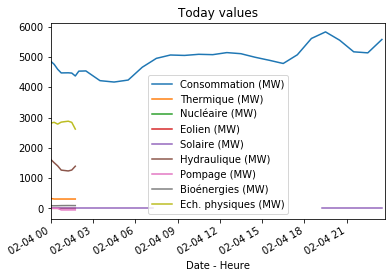

In [44]:
# Today values
today = date.today().strftime("%Y-%m-%d")
dailyData[today].plot(x='Date - Heure', title="Today values")
# TODO: replace with : data.loc[data['Date - Heure'] == today].plot(x='Date - Heure', title="Today values")

In [45]:
def getExtremums(data, key):
    dailyData = getDailyData(data, 'Date - Heure', volumeLabels) # get dataframes per day
    min_serie = data.loc[data[key] == min(data[key])]['Date'] # Date column of data's serie where data[key] is min
    min_df = dailyData[pd.to_datetime(min_serie.values[0]).strftime('%Y-%m-%d')] # cell's value (date) to string
    max_serie = data.loc[data[key] == max(data[key])]['Date'] # Date column of data's serie where data[key] is max
    max_df = dailyData[pd.to_datetime(max_serie.values[0]).strftime('%Y-%m-%d')] # cell's value (date) to string
    return min_df, max_df

In [46]:
min_df, max_df = getExtremums(data, 'Consommation (MW)')

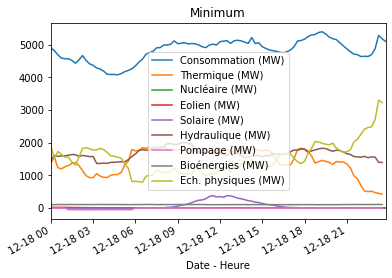

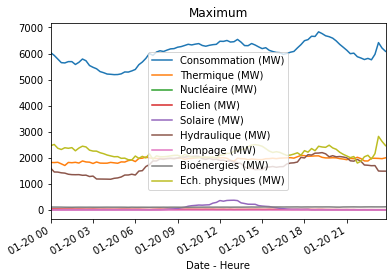

In [47]:
min_df.plot(x='Date - Heure', title="Minimum")
max_df.plot(x='Date - Heure', title="Maximum")

In [48]:
avg_df = data.mean()
avg_df

Code INSEE région        93.000000
Consommation (MW)      5360.925967
Thermique (MW)         1116.776148
Nucléaire (MW)                 NaN
Eolien (MW)              12.008533
Solaire (MW)            106.618843
Hydraulique (MW)       1432.230137
Pompage (MW)             -5.680580
Bioénergies (MW)        107.703143
Ech. physiques (MW)    2586.043030
TCO Thermique (%)        20.487987
TCH Thermique (%)        34.068541
TCO Nucléaire (%)              NaN
TCH Nucléaire (%)              NaN
TCO Eolien (%)            0.228139
TCH Eolien (%)           25.017588
TCO Solaire (%)           1.970376
TCH Solaire (%)           8.233297
TCO Hydraulique (%)      26.668525
TCH Hydraulique (%)      43.827391
TCO Bioénergies (%)       2.021960
TCH Bioénergies (%)      36.758904
Column 26                      NaN
dtype: float64

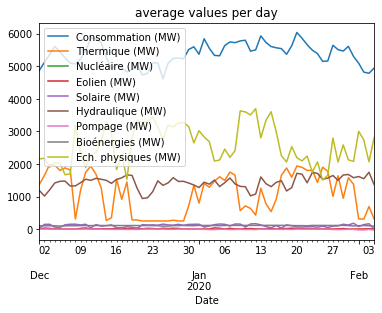

In [49]:
# average values per day
avg_day = data[['Date'] + volumeLabels].groupby(['Date']).agg(np.mean)
avg_day.plot(title="average values per day")

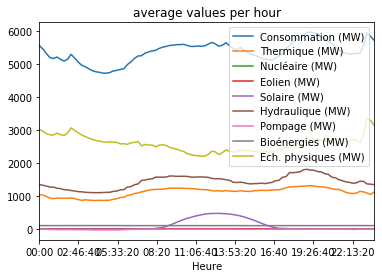

In [50]:
# average values per hour
avg_hr = data[['Heure'] + volumeLabels].groupby(['Heure']).agg(np.mean)
ax = avg_hr.plot(title="average values per hour")

Text(0, 0.5, '')

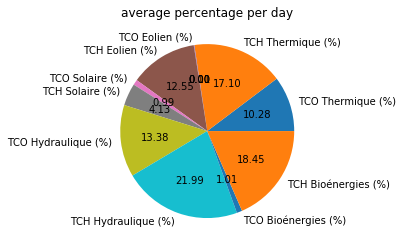

In [51]:
# average percentage per day
percent_df = data[percentLabels].mean()
ax = percent_df.plot(autopct='%.2f', kind='pie', title='average percentage per day')
ax.set_ylabel('')